# Purpose
Creating a network which checks the replay attack 
with sbf EKMs
Assumptions:
- x_lead are the EKMs from IMDs ECG signals.
- So we use y_lead as the programmer's signal
- 500 EKMs for each user

# Imports and installations

In [1]:
import os
from datetime import datetime
import random

In [2]:
from PIL import Image
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from PIL import Image
import numpy as np
import zipfile
from pathlib import Path as path

# Unzipping the 6 sbf dataset

In [6]:
# Define the dataset path and output directories
dataset_path = path("../sbf no 1_6sbf/EKMs_6sbf.zip")
unzip_dir = path("../users_zip_files_6sbf")
users_ekm_dir = path("../users_EKM_files_6sbf")

In [7]:
# Unzip the main dataset file
if not unzip_dir.exists() and not len(list(unzip_dir.joinpath("Users EKM zip").glob('*'))) == 199:
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

In [8]:
# Create directory for user EKM files if it doesn't exist
os.makedirs(users_ekm_dir, exist_ok=True)

In [9]:
# Unzip individual user EKM zip files
user_zip_path = os.path.join(unzip_dir, "Users EKM zip")
if os.path.exists(user_zip_path):
    for _file in os.listdir(user_zip_path):
        file_name, _ = os.path.splitext(_file)
        file_dir = os.path.join(users_ekm_dir, file_name)
        
        os.makedirs(file_dir, exist_ok=True)
        
        with zipfile.ZipFile(os.path.join(user_zip_path, _file), 'r') as zip_ref:
            zip_ref.extractall(file_dir)

# Healthy EKMs check
- Moving window checking

In [10]:
path = f"{users_ekm_dir}/2005/x_lead"

In [11]:
EKMs = os.listdir(path)

In [12]:
def are_images_identical(image1_path, image2_path):
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)

    return np.array_equal(np.array(img1), np.array(img2))

In [13]:
path_EKM1 = path + "/" + EKMs[0]
path_EKM2 = path + "/" + EKMs[1]

result = are_images_identical(path_EKM1, path_EKM2)
print("Images are identical:" if result else "Images are different.")

Images are different.


# PlayGround

# Creating dictionary of list of each user's EKMs

In [16]:
dataset_path = "../users_EKM_files_6sbf"

In [17]:
# Getting users id
users_id = []
dirs = os.listdir(dataset_path)
for dir in dirs:
  # if dir.startswith("EKM_dataset_"):
  user_id = dir.split("_")[-1]
  users_id.append(user_id)

In [18]:
len(users_id)

199

In [20]:
# ! ls "$dataset_path"/EKM_dataset_2005/x_lead | head
os.listdir(f"{dataset_path}/2005/x_lead")[:10]

['6sbf-ekm-no1_ekm_dataset-2005-0.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1.png',
 '6sbf-ekm-no1_ekm_dataset-2005-10.png',
 '6sbf-ekm-no1_ekm_dataset-2005-100.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1000.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1001.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1002.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1003.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1004.png',
 '6sbf-ekm-no1_ekm_dataset-2005-1005.png']

In [21]:
# Creating dict of counters for each randomly-chosen users
# of ecg 200 dataset
# Also creating dict of users' EKMs
ecg_200_users_EKM_amount_dict_ylead = {}
ecg_200_users_EKMs_dict_ylead = {}

for user in users_id:
  ecg_200_users_EKM_amount_dict_ylead[user] = 0
  ecg_200_users_EKMs_dict_ylead[user] = []

# Counting each user's EKMs in dataset and collecting EKMs of him/her
users_files = os.listdir(dataset_path)

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
      # ecg_200_users_EKM_amount_dict_ylead[user_id] = len(os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/y_lead"))
      # ecg_200_users_EKMs_dict_ylead[user_id] = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/y_lead")
      ecg_200_users_EKM_amount_dict_ylead[user_id] = len(os.listdir(f"{dataset_path}/{user_id}/y_lead"))
      ecg_200_users_EKMs_dict_ylead[user_id] = os.listdir(f"{dataset_path}/{user_id}/y_lead")

In [22]:
# Creating dict of counters for each randomly-chosen users
# of ecg 200 dataset
# Also creating dict of users' EKMs
ecg_200_users_EKM_amount_dict_xlead = {}
ecg_200_users_EKMs_dict_xlead = {}

for user in users_id:
  ecg_200_users_EKM_amount_dict_xlead[user] = 0
  ecg_200_users_EKMs_dict_xlead[user] = []

# Counting each user's EKMs in dataset and collecting EKMs of him/her
users_files = os.listdir(dataset_path)

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
      # ecg_200_users_EKM_amount_dict_xlead[user_id] = len(os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/x_lead"))
      # ecg_200_users_EKMs_dict_xlead[user_id] = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/x_lead")
      ecg_200_users_EKM_amount_dict_xlead[user_id] = len(os.listdir(f"{dataset_path}/{user_id}/x_lead"))
      ecg_200_users_EKMs_dict_xlead[user_id] = os.listdir(f"{dataset_path}/{user_id}/x_lead")

In [23]:
# Creating dict of counters for each randomly-chosen users
# of ecg 200 dataset
# Also creating dict of users' EKMs
ecg_200_users_EKM_amount_dict_zlead = {}
ecg_200_users_EKMs_dict_zlead = {}

for user in users_id:
  ecg_200_users_EKM_amount_dict_zlead[user] = 0
  ecg_200_users_EKMs_dict_zlead[user] = []

# Counting each user's EKMs in dataset and collecting EKMs of him/her
users_files = os.listdir(dataset_path)

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
      # ecg_200_users_EKM_amount_dict_zlead[user_id] = len(os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/z_lead"))
      # ecg_200_users_EKMs_dict_zlead[user_id] = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/z_lead")
      ecg_200_users_EKM_amount_dict_zlead[user_id] = len(os.listdir(f"{dataset_path}/{user_id}/z_lead"))
      ecg_200_users_EKMs_dict_zlead[user_id] = os.listdir(f"{dataset_path}/{user_id}/z_lead")

In [24]:
min(ecg_200_users_EKM_amount_dict_zlead.values())

3000

In [25]:
min(ecg_200_users_EKM_amount_dict_ylead.values())

3000

In [26]:
min(ecg_200_users_EKM_amount_dict_xlead.values())

3000

# Selecting EKMs

In [27]:
X = []
y = []

## Selecting True labels (Same time, Same user)

In [28]:
# Selecting N amount of EKMs for each user
true_tuples = []

N_each_user_ekms_amount = 500

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
    #   user_id_ekms_ylead = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/y_lead/")[:N_each_user_ekms_amount]
    #   user_id_ekms_xlead = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/x_lead/")[:N_each_user_ekms_amount]

      user_id_ekms_ylead = os.listdir(f"{dataset_path}/{user_id}/y_lead/")[:N_each_user_ekms_amount]
      user_id_ekms_xlead = os.listdir(f"{dataset_path}/{user_id}/x_lead/")[:N_each_user_ekms_amount]

      
      for ekm_index in range(N_each_user_ekms_amount):
        # true_tuple = (f"{dataset_path}/EKM_dataset_{user_id}/y_lead/{user_id_ekms_ylead[ekm_index]}", f"{dataset_path}/EKM_dataset_{user_id}/x_lead/{user_id_ekms_xlead[ekm_index]}")
        true_tuple = (f"{dataset_path}/{user_id}/y_lead/{user_id_ekms_ylead[ekm_index]}", f"{dataset_path}/{user_id}/x_lead/{user_id_ekms_xlead[ekm_index]}")
        true_tuples.append(true_tuple)

In [29]:
true_tuples

[('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-0.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-0.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-1.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-1.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-10.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-10.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-100.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-100.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-1000.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-1000.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-1001.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-1001.png'),
 ('../users_EKM_files_6sbf/1

In [30]:
X = X + true_tuples
y = y + [1 for _ in range(len(true_tuples))]

## Selecting False labels (Same users, different times)

In [31]:
import re

# Function to extract the last number in the string
def extract_last_number(file_name):
    match = re.search(r'(\d+)-(\d+)\.png$', file_name)
    if match:
        return int(match.group(2))
    return None

In [32]:
# Selecting N amount of EKMs for each user
false_tuples = []

N_each_user_ekms_amount = 500

for _files in users_files:
    user_id = _files.split("_")[-1]

    if user_id in users_id:
      # user_id_ekms_ylead = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/y_lead/")
      # user_id_ekms_xlead = os.listdir(f"{dataset_path}/EKM_dataset_{user_id}/x_lead/")

      user_id_ekms_ylead = os.listdir(f"{dataset_path}/{user_id}/y_lead/")
      user_id_ekms_xlead = os.listdir(f"{dataset_path}/{user_id}/x_lead/")

      # Sort the array based on the last serial number
      user_id_ekms_ylead = sorted(user_id_ekms_ylead, key=extract_last_number)
      user_id_ekms_xlead = sorted(user_id_ekms_xlead, key=extract_last_number)

      for _ in range(N_each_user_ekms_amount):
        xlead_rand_ekm = random.randint(0, ecg_200_users_EKM_amount_dict_xlead[str(user_id)] - 2)
        ylead_rand_ekm = random.randint(xlead_rand_ekm + 1, ecg_200_users_EKM_amount_dict_ylead[str(user_id)] - 1)

        # false_tuple = (f"{dataset_path}/EKM_dataset_{user_id}/y_lead/{user_id_ekms_ylead[ylead_rand_ekm]}", f"{dataset_path}/EKM_dataset_{user_id}/x_lead/{user_id_ekms_xlead[xlead_rand_ekm]}")
        false_tuple = (f"{dataset_path}/{user_id}/y_lead/{user_id_ekms_ylead[ylead_rand_ekm]}", f"{dataset_path}/{user_id}/x_lead/{user_id_ekms_xlead[xlead_rand_ekm]}")
        false_tuples.append(false_tuple)

In [33]:
false_tuples

[('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-2923.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-2817.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-2494.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-2457.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-2812.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-2372.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-2954.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-880.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-268.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-245.png'),
 ('../users_EKM_files_6sbf/10022/y_lead/6sbf-ekm-no1_ekm_dataset-10022-2975.png',
  '../users_EKM_files_6sbf/10022/x_lead/6sbf-ekm-no1_ekm_dataset-10022-2183.png'),
 ('../users_E

In [34]:
X = X + false_tuples
y = y + [0 for _ in range(len(false_tuples))]

# Spliting train/test data

In [35]:
# Splitting train and test data by proportion of 80/20
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorization of EKMs

In [36]:
def vertorizing_png_imges(address):
  # Load the PNG image
  image = Image.open(address)

  # Convert the image to RGB mode
  image = image.convert('RGB')

  # Resize the image to match the input size expected by the CNN
  desired_width = 31
  desired_height = 20
  image = image.resize((desired_width, desired_height))

  # Convert the image to a NumPy array
  image_array = np.array(image)

  # Reshape the array to match the input shape expected by the CNN
  # image_array = image_array.reshape((1, desired_height, desired_width, 3))

  # Normalize the array
  image_array = image_array.astype('float32') / 255.0

  return image_array

In [37]:
from IPython.display import clear_output

def progress_bar(index, total_length, name_of_list):
    bar_length = 50

    # Calculate the percentage of completion
    percent_complete = (index / total_length) * 100

    # Clear the current cell's output
    clear_output(wait=True)

    print(name_of_list)

    # Print the progress bar
    print("[", end="")
    completed_blocks = int(bar_length * (percent_complete / 100))
    print("*" * completed_blocks, end="")
    print("-" * (bar_length - completed_blocks), end="]\n")

    # Print the progress in the format: index/total_length
    print(f"{index}/{total_length}")

In [38]:
def vectorizing_list_of_ekms(ekm_list, name_of_list):
    # Vectorize a list of EKMs and return it
    num_ekms = len(ekm_list)
    vectorized_ekms = np.empty((num_ekms, 20, 31, 3), dtype=np.float32)

    for _, ekm_path in enumerate(ekm_list):
        veced_ekm = vertorizing_png_imges(ekm_path)
        vectorized_ekms[_, :] = veced_ekm
        if _ % 1000 == 0:
            progress_bar(_, num_ekms, name_of_list)

    return vectorized_ekms

In [39]:
# Vectorizing EKMs
X_train_xlead = [ekm[1] for ekm in X_train]
X_train_xlead = np.array(X_train_xlead)
X_train_xlead = vectorizing_list_of_ekms(X_train_xlead, "No.1 => X_train_ylead")

X_train_ylead = [ekm[0] for ekm in X_train]
X_train_ylead = np.array(X_train_ylead)
X_train_ylead = vectorizing_list_of_ekms(X_train_ylead, "No.2 => X_train_xlead")


X_test_xlead = [ekm[1] for ekm in X_test]
X_test_xlead = np.array(X_test_xlead)
X_test_xlead = vectorizing_list_of_ekms(X_test_xlead, "No.3 => X_test_ylead")

X_test_ylead = [ekm[0] for ekm in X_test]
X_test_ylead = np.array(X_test_ylead)
X_test_ylead = vectorizing_list_of_ekms(X_test_ylead, "No.4 => X_test_xlead")

No.4 => X_test_xlead
[************************************************--]
39000/39800


# Siamese network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow.keras.backend as K
import tensorflow as tf

In [41]:
def build_siamese_model(input_shape, embeddingDim=54):
  # Specify the inputs for the feature extractor network
  inputs = Input(input_shape)

  # Defining network layers
  x = Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)(inputs)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  # x = Dropout(0.7)(x)

  # Add more convolutional layer
  x = Conv2D(64, (3, 3), activation='relu')(x)
  # x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(0.7)(x)

  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(16, activation='relu')(x)
  # x = Dense(8, activation='softmax')(x)
  x = Dense(8, activation='relu')(x)
  outputs = Dense(embeddingDim)(x)

  # build the model
  model = Model(inputs, outputs)

  return model

In [42]:
# Input layer for the Siamese network
input_shape = (20, 31, 3)
input_left = Input(shape=input_shape, name='input_left')
input_right = Input(shape=input_shape, name='input_right')

# Creating the Siamese network
featureExtractor = build_siamese_model(input_shape)
output_left = featureExtractor(input_left)
output_right = featureExtractor(input_right)

d:\Amihossein\panTompkins\bpf based in boudary EKM alpha 0.2 elements 6000\allenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Custom layer to calculate the Euclidean distance between the outputs
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [44]:
# Use the Lambda layer to create a custom layer for the Euclidean distance
distance = Lambda(euclidean_distance, output_shape=(1,))([output_left, output_right])

# Creating last layer as dense layer with 1 neuron and sigmoid activation function
outputs = Dense(1, activation="sigmoid")(distance)

# Creating main model
siamese_model = Model(inputs=[input_left, input_right], outputs=outputs)

In [45]:
# Compile the Siamese model with the contrastive loss
optimizer = Adam(learning_rate=0.001)
siamese_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

# Print the summary of the Siamese model
siamese_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_left          │ (None, 20, 31, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_right         │ (None, 20, 31, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 54)        │    719,134 │ input_left[0][0], │
│ (Functional)        │                   │            │ input_right[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │          2 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 719,136 (2.74 MB)

 Trainable params: 719,136 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Training parameters
epochs = 60
batch_size = 32

# Train the model
history = siamese_model.fit(
	[X_train_xlead, X_train_ylead], y_train,
	validation_data=([X_test_xlead, X_test_ylead], y_test),
	batch_size=batch_size,
	epochs=epochs)

Epoch 1/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 121s 24ms/step - accuracy: 0.7559 - loss: 0.4596 - val_accuracy: 0.9444 - val_loss: 0.1726
Epoch 2/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 108s 22ms/step - accuracy: 0.9408 - loss: 0.1858 - val_accuracy: 0.9527 - val_loss: 0.1307
Epoch 3/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 108s 22ms/step - accuracy: 0.9537 - loss: 0.1457 - val_accuracy: 0.9587 - val_loss: 0.1236
Epoch 4/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 108s 22ms/step - accuracy: 0.9581 - loss: 0.1330 - val_accuracy: 0.9627 - val_loss: 0.1130
Epoch 5/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 108s 22ms/step - accuracy: 0.9600 - loss: 0.1265 - val_accuracy: 0.9580 - val_loss: 0.1159
Epoch 6/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 107s 21ms/step - accuracy: 0.9620 - loss: 0.1197 - val_accuracy: 0.9604 - val_loss: 0.1107
Epoch 7/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 108s 22ms/step - accuracy: 0.9637 - loss: 0.1146 - val_accuracy: 0.9691 - val_loss: 0.1059
Epoch 8/60
4975/4975 ━━━━━━━━━━━━━━━━━━━━ 107s 22ms/step - accuracy: 

KeyboardInterrupt: 

# Evaluation

## Accuracy, loss

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = siamese_model.evaluate([X_test_xlead, X_test_ylead], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
pre = siamese_model.predict([X_test_xlead, X_test_ylead])

In [38]:
# Threshold finder
positive_pre = []
negative_pre = []

for pred, actual in zip(pre, y_test):
    if actual == 1: 
        positive_pre.extend(pred)
    elif actual == 0:
        negative_pre.extend(pred)

In [39]:
sum(positive_pre) / len(positive_pre)

0.9765555362615326

In [40]:
sum(negative_pre) / len(negative_pre)

0.03651785180328671

In [44]:
lower_treshhold = 0.90

model_output = []
for index in range(len(y_test)):
  if pre[index] >= lower_treshhold:
    model_output.append(1)
  else:
      model_output.append(0)

In [45]:
tp = 0
tn = 0
fp = 0
fn = 0

for index in range(len(model_output)):
  if model_output[index] == 1 and y_test[index] == 1:
      tp += 1
  if model_output[index] == 1 and y_test[index] == 0:
    fp += 1
  if model_output[index] == 0 and y_test[index] == 0:
    tn += 1
  if model_output[index] == 0 and y_test[index] == 1:
    fn += 1

In [46]:
acc = (tp + tn) / len(y_test)
acc

0.9764070351758793

## AUPR

In [59]:
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.utils import to_categorical

In [60]:
def calculate_aupr(y_true, y_pred_probs):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR).
    """
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred_probs.ravel())
    aupr = auc(recall, precision)
    return aupr

In [75]:
y_pred_probs = np.array([[1, 0] if pred == 0 else [0, 1] for pred in model_output])
y_test_onehot = to_categorical(y_test, num_classes=2)

aupr = calculate_aupr(y_test_onehot, y_pred_probs)
print(f"AUPR: {aupr:.4f}")

AUPR: 0.9823


## AUC-ROC

In [77]:
from sklearn.metrics import roc_auc_score

def calculate_auc_roc(y_true, y_pred_probs):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).
    """
    auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')  # 'ovr' for one-vs-rest
    return auc_roc

In [79]:
y_pred_probs = np.array(model_output)
auc_roc = calculate_auc_roc(y_test, y_pred_probs)
print(f"AUC-ROC: {auc_roc:.4f}")

AUC-ROC: 0.9764


## Confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    return cm

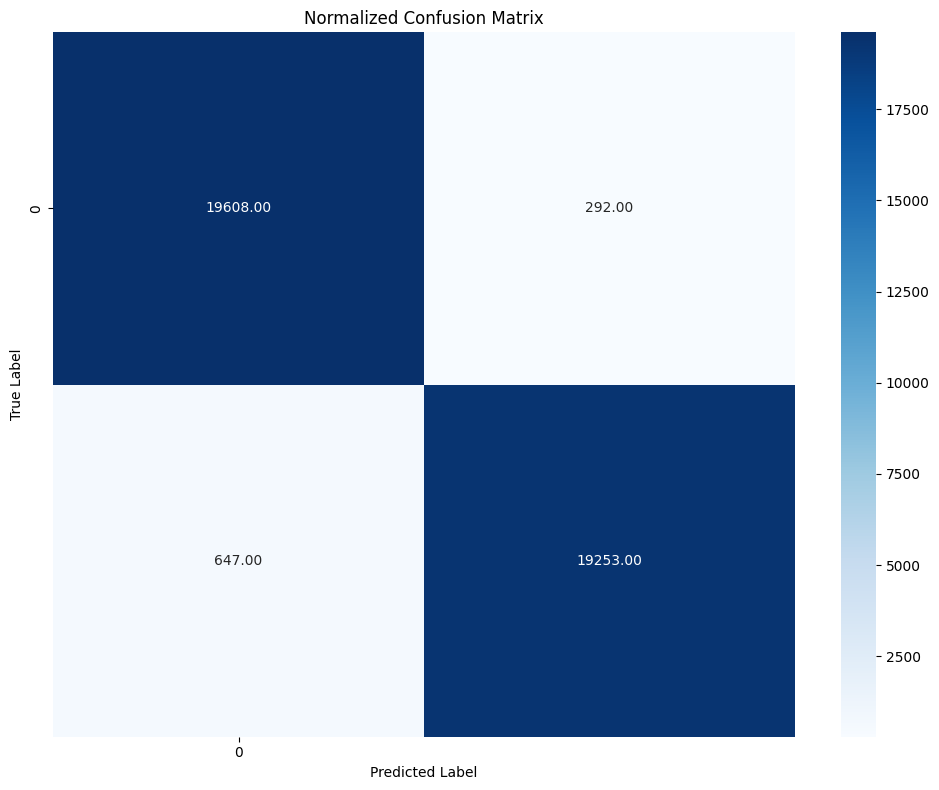

In [85]:
y_pred_probs = np.array(model_output)
# y_pred = np.argmax(y_pred_probs, axis=1)
cm = calculate_confusion_matrix(y_test, y_pred_probs)
class_names = 2
 
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
plt.close()

# Saving the model

In [86]:
# Save the model in HDF5 format
siamese_model.save("../6sbf_replayCheck.h5")

/home/sadeghi/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
siamese_model = load_model("../6sbf_replayCheck.h5")

# 10 fold validation

In [339]:
from sklearn.model_selection import StratifiedKFold

In [340]:
n_splits = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [341]:
# Metrics to store performance
folds_evaluation = {}
fold_accuracies = []
fold_accuracies_with_treshold = []

for index in range(n_splits):
    folds_evaluation[index] = {}

In [ ]:
X[:10]

In [91]:
# Vectorizing EKMs
X_xlead = [ekm[1] for ekm in X]
X_xlead = np.array(X_xlead)
X_xlead = vectorizing_list_of_ekms(X_xlead, "No.1 => x lead")

X_ylead = [ekm[0] for ekm in X]
X_ylead = np.array(X_ylead)
X_ylead = vectorizing_list_of_ekms(X_ylead, "No.2 => y lead")


No.2 => y lead
[*************************************************-]
198999/199000


In [344]:
fold_counter = 0

# 10-fold Cross Validation
for train_index, val_index in skf.split(np.hstack([X_xlead, X_ylead]), y):

    # Split data
    X_train_xlead, X_val_xlead = X_xlead[train_index], X_xlead[val_index]
    X_train_ylead, X_val_ylead = X_ylead[train_index], X_ylead[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    siamese_model = Model(inputs=[input_left, input_right], outputs=outputs)
    siamese_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

    # Train your model
    siamese_model.fit(
        [X_train_xlead, X_train_ylead], y_train,
        validation_data=([X_val_xlead, X_val_ylead], y_val),
        epochs=60,
        batch_size=128
    )
    
    # Validate the model
    # Accuracy, loss
    val_loss, val_accuracy = siamese_model.evaluate([X_val_xlead, X_val_ylead], y_val, verbose=2)
    fold_accuracies.append(val_accuracy)

    pre = siamese_model.predict([X_val_xlead, X_val_ylead])
    lower_treshhold = 0.90

    model_output = []
    for index in range(len(y_val)):
        if pre[index] >= lower_treshhold:
            model_output.append(1)
        else:
            model_output.append(0)

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for index in range(len(model_output)):
        if model_output[index] == 1 and y_val[index] == 1:
            tp += 1
        if model_output[index] == 1 and y_val[index] == 0:
            fp += 1
        if model_output[index] == 0 and y_val[index] == 0:
            tn += 1
        if model_output[index] == 0 and y_val[index] == 1:
            fn += 1
    
    acc_with_treshold = (tp + tn) / len(y_val)
    fold_accuracies_with_treshold.append(acc_with_treshold)

    # AUPR
    y_pred_probs = np.array([[1, 0] if pred == 0 else [0, 1] for pred in model_output])
    y_test_onehot = to_categorical(y_val, num_classes=2)
    aupr = calculate_aupr(y_test_onehot, y_pred_probs)

    # AUC-ROC
    y_pred_probs = np.array(model_output)
    auc_roc = calculate_auc_roc(y_val, y_pred_probs)
    
    # Saving the evaluation results
    folds_evaluation[fold_counter]["accuracy"] =  val_accuracy
    folds_evaluation[fold_counter]["accuracy with treshold"] = acc_with_treshold
    folds_evaluation[fold_counter]["loss"] =  val_loss
    folds_evaluation[fold_counter]["AUPR"] =  aupr
    folds_evaluation[fold_counter]["AUC_ROC"] = auc_roc
    
    fold_counter += 1
    print(f"Completed fold {fold_counter}/{n_splits}")

Epoch 1/60
1400/1400 [==============================] - 30s 20ms/step - loss: 0.4231 - accuracy: 0.8306 - val_loss: 0.2653 - val_accuracy: 0.9408
Epoch 2/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.2461 - accuracy: 0.9417 - val_loss: 0.1938 - val_accuracy: 0.9428
Epoch 3/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.1995 - accuracy: 0.9431 - val_loss: 0.1701 - val_accuracy: 0.9447
Epoch 4/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.1835 - accuracy: 0.9438 - val_loss: 0.1690 - val_accuracy: 0.9442
Epoch 5/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.1758 - accuracy: 0.9452 - val_loss: 0.1703 - val_accuracy: 0.9410
Epoch 6/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.1718 - accuracy: 0.9458 - val_loss: 0.1638 - val_accuracy: 0.9457
Epoch 7/60
1400/1400 [==============================] - 27s 19ms/step - loss: 0.1535 - accuracy: 0.9532 - val_loss: 0.1302 -

In [345]:
folds_evaluation

{0: {'accuracy': 0.9673366546630859,
  'accuracy with treshold': 0.9713065326633166,
  'loss': 0.1364237517118454,
  'AUPR': 0.9784798994974875,
  'AUC_ROC': 0.9713065326633165},
 1: {'accuracy': 0.9759296774864197,
  'accuracy with treshold': 0.9792462311557789,
  'loss': 0.08240962028503418,
  'AUPR': 0.9844346733668341,
  'AUC_ROC': 0.9792462311557789},
 2: {'accuracy': 0.9788442254066467,
  'accuracy with treshold': 0.9835678391959799,
  'loss': 0.06689940392971039,
  'AUPR': 0.987675879396985,
  'AUC_ROC': 0.9835678391959799},
 3: {'accuracy': 0.9860301613807678,
  'accuracy with treshold': 0.9892964824120603,
  'loss': 0.03668554127216339,
  'AUPR': 0.9919723618090451,
  'AUC_ROC': 0.9892964824120604},
 4: {'accuracy': 0.9901005029678345,
  'accuracy with treshold': 0.9909045226130653,
  'loss': 0.029401760548353195,
  'AUPR': 0.993178391959799,
  'AUC_ROC': 0.9909045226130653},
 5: {'accuracy': 0.991809070110321,
  'accuracy with treshold': 0.9910050251256282,
  'loss': 0.024776

In [346]:
# Average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print("10-Fold Cross-Validation Accuracy:", average_accuracy)

10-Fold Cross-Validation Accuracy: 0.9862663328647614


In [347]:
# Average accuracy with treshold across folds
average_accuracy_with_threshold = np.mean(fold_accuracies_with_treshold)
print("10-Fold Cross-Validation Accuracy with threshold:", average_accuracy_with_threshold)

10-Fold Cross-Validation Accuracy with threshold: 0.9880452261306532


In [348]:
folds_evaluation["average_accuracy"] = average_accuracy
folds_evaluation["average_accuracy_with_threshold"] = average_accuracy_with_threshold

In [349]:
import json

# Save to a text file
with open("../6sbf_replayCheck_Siamese_nodataleak.txt", "w") as file:
    json.dump(folds_evaluation, file, indent=4) 

In [350]:
np.min(fold_accuracies)

0.9673366546630859

In [351]:
np.max(fold_accuracies)

0.9943215847015381

In [352]:
np.min(fold_accuracies_with_treshold)

0.9713065326633166

In [353]:
np.max(fold_accuracies_with_treshold)

0.9952763819095477

# Convolotional Network (concate the EKMs)

## Vectorization of EKMs

In [113]:
def vertorizing_png_imges(address):
  # Load the PNG image
  image = Image.open(address)

  # Convert the image to RGB mode
  image = image.convert('RGB')

  # Resize the image to match the input size expected by the CNN
  desired_width = 31
  desired_height = 20
  image = image.resize((desired_width, desired_height))

  # Convert the image to a NumPy array
  image_array = np.array(image)

  # Reshape the array to match the input shape expected by the CNN
  # image_array = image_array.reshape((1, desired_height, desired_width, 3))

  # Normalize the array
  image_array = image_array.astype('float32') / 255.0

  return image_array

In [114]:
def vectorizing_list_of_tuple_ekms(tuples_ekm_list, name_of_list):
    # Get the number of tuples
    num_tuple_ekms = len(tuples_ekm_list)
    
    # Create an empty array with the desired shape
    vectorized_ekms = np.empty((num_tuple_ekms, 2, 20, 31, 3), dtype=np.float32)
    
    # Assuming tuples_ekm_list is a list of tuples, each containing two elements of shape (20, 31, 3)
    for idx, (first, second) in enumerate(tuples_ekm_list):
        vectorized_ekms[idx, 0] = vertorizing_png_imges(first)
        vectorized_ekms[idx, 1] = vertorizing_png_imges(second)
        progress_bar(idx, num_tuple_ekms, name_of_list)
    
    return vectorized_ekms

In [116]:
# Vectorizing EKMs
X = np.array(X)
X = vectorizing_list_of_tuple_ekms(X, "X!")

X!
[*************************************************-]
198999/199000


In [117]:
# Concatenate the elements of each tuple horizontally
concatenated_X = [np.hstack((tup[0], tup[1])) for tup in X]

In [118]:
concatenated_X = np.array(concatenated_X)
concatenated_X[0].size

3720

## Model and prepration of data for fitting them to model

In [120]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam

## Model architeture

### Improved model: No.1

In [131]:
# Creating the CNN model
model = Sequential([
      Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(20, 62, 3)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      
      # Added fewer pooling layers to avoid excessive reduction of dimensions
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),
      
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),

      Dropout(0.7),

      Flatten(),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(8, activation='relu'),
      Dense(2, activation='softmax')
])

# Setting Adam optimizer
optimizer = Adam(learning_rate=0.001)

# Compileing the model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=60, batch_size=128)

### Resnet model

In [146]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.image import resize

In [147]:
def preprocess_data(X, target_size=(32, 128)):
    # Resize or pad images to the target size
    resized_images = np.array([resize(img, target_size).numpy() for img in X])
    return resized_images

In [148]:
def create_resnet_model(input_shape):
    base_model = ResNet50(include_top=False, weights=None, input_shape=input_shape)
    output = GlobalAveragePooling2D()(base_model.output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(1, activation='sigmoid', name='Similarity')(output)
    model = Model(inputs=base_model.input, outputs=output)
    return model

In [149]:
# Adjust input shape for resized images (resnet model requires it!)
input_shape = (32, 128, 3)

# Preprocess data to match model input shape
X_preprocessed = preprocess_data(X, target_size=(32, 128))
                          
# Create the model
resnet_model = create_resnet_model(input_shape)

# Compile the model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 128, 3)]         0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 134, 3)           0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

### Splitting train/test data (EKMs)

In [151]:
# Splitting train and test data by proportion of 80/20
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
# Train the model
resnet_model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/60
3980/3980 [==============================] - 1176s 295ms/step - loss: 0.2782 - accuracy: 0.8730 - val_loss: 0.1466 - val_accuracy: 0.9498
Epoch 2/60
3980/3980 [==============================] - 1143s 287ms/step - loss: 0.1273 - accuracy: 0.9552 - val_loss: 0.0811 - val_accuracy: 0.9720
Epoch 3/60
3980/3980 [==============================] - 1142s 287ms/step - loss: 0.0719 - accuracy: 0.9741 - val_loss: 0.0639 - val_accuracy: 0.9761
Epoch 4/60
3980/3980 [==============================] - 1138s 286ms/step - loss: 0.0571 - accuracy: 0.9788 - val_loss: 0.0558 - val_accuracy: 0.9792
Epoch 5/60
3980/3980 [==============================] - 1139s 286ms/step - loss: 0.0494 - accuracy: 0.9806 - val_loss: 0.0530 - val_accuracy: 0.9812
Epoch 6/60
3980/3980 [==============================] - 1138s 286ms/step - loss: 0.0435 - accuracy: 0.9825 - val_loss: 0.0485 - val_accuracy: 0.9800
Epoch 7/60
3980/3980 [==============================] - 1137s 286ms/step - loss: 0.0384 - accuracy: 0.9841

KeyboardInterrupt: 

In [153]:
model = resnet_model

### Evaluation

#### Accuracy, loss

In [154]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1244/1244 - 62s - loss: 0.0401 - accuracy: 0.9856 - 62s/epoch - 50ms/step
Test Loss: 0.0401
Test Accuracy: 0.9856


#### AUPR

In [155]:
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.utils import to_categorical

In [156]:
def calculate_aupr(y_true, y_pred_probs):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR).
    """
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred_probs.ravel())
    aupr = auc(recall, precision)
    return aupr

In [161]:
y_pred_probs = model.predict(X_test)
# y_test_onehot = to_categorical(y_test, num_classes=2)

aupr = calculate_aupr(y_test, y_pred_probs)
print(f"AUPR: {aupr:.4f}")

1244/1244 [==============================] - 65s 52ms/step
AUPR: 0.9990


#### AUC-ROC

In [162]:
from sklearn.metrics import roc_auc_score

def calculate_auc_roc(y_true, y_pred_probs):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).
    """
    auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')  # 'ovr' for one-vs-rest
    return auc_roc

In [163]:
y_pred_probs = model.predict(X_test)
auc_roc = calculate_auc_roc(y_test, y_pred_probs)
print(f"AUC-ROC: {auc_roc:.4f}")

1244/1244 [==============================] - 64s 52ms/step
AUC-ROC: 0.9991


#### Confusion matrix

In [164]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    return cm

1244/1244 [==============================] - 64s 51ms/step


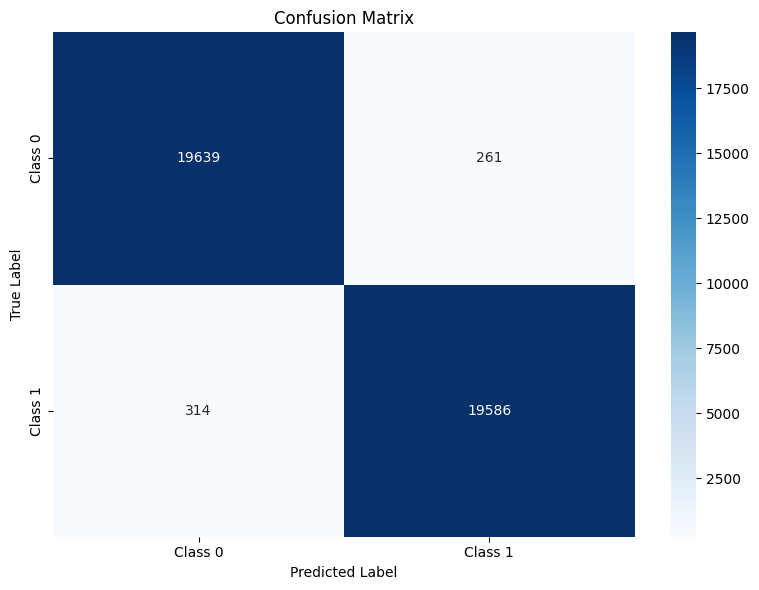

In [182]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names for binary classification
class_names = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Saving the model

In [183]:
# Save the model in HDF5 format
model.save("../6sbf_replayCheck_ResNet50.h5")

/home/sadeghi/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Loading the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model = load_model("../6sbf_replayCheck_ResNet50.h5")

### 10 fold validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
n_splits = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Metrics to store performance
folds_evaluation = {}
fold_accuracies = []

for index in range(n_splits):
    folds_evaluation[index] = {}

In [ ]:
fold_counter = 0

# 10-fold Cross Validation
for train_index, val_index in skf.split(X_preprocessed, y):

    # Split data
    X_train, X_val = X_preprocessed[train_index], X_preprocessed[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train your model (assuming you have a model object `model`)
    model.fit(X_train, y_train, epochs=100, batch_size=128)
    
    # Validate the model
    # Accuracy, loss
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
    fold_accuracies.append(val_accuracy)

    # AUPR
    y_pred_probs = model.predict(X_val)
    y_test_onehot = to_categorical(y_val, num_classes=2)
    aupr = calculate_aupr(y_test_onehot, y_pred_probs)

    # AUC-ROC
    auc_roc = calculate_auc_roc(y_val, y_pred_probs)
    
    # Saving the evaluation results
    folds_evaluation[fold_counter]["accuracy"] =  val_accuracy
    folds_evaluation[fold_counter]["loss"] =  val_loss
    folds_evaluation[fold_counter]["AUPR"] =  aupr
    folds_evaluation[fold_counter]["AUC_ROC"] = auc_roc
    
    fold_counter += 1

In [ ]:
folds_evaluation

In [ ]:
# Average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print("10-Fold Cross-Validation Accuracy:", average_accuracy)

In [ ]:
folds_evaluation["average_accuracy"] = average_accuracy

In [ ]:
import json

# Save to a text file
with open("../6sbf_replayCheck_Conv.txt", "w") as file:
    json.dump(folds_evaluation, file, indent=4) 

In [ ]:
np.min(fold_accuracies)

In [ ]:
np.max(fold_accuracies)

### MobileNet model

In [226]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.image import resize

In [227]:
def preprocess_data(X, target_size=(32, 128)):
    # Resize images to the target size
    resized_images = np.array([resize(img, target_size).numpy() for img in X])
    return resized_images

In [228]:
def create_mobilenet_model(input_shape):
    # Load MobileNet with no top layer
    base_model = MobileNet(include_top=False, weights=None, input_shape=input_shape)
    
    # Add global average pooling and fully connected layers
    output = GlobalAveragePooling2D()(base_model.output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(1, activation='sigmoid', name='Similarity')(output)
    model = Model(inputs=base_model.input, outputs=output)
    return model

In [229]:
# Preprocess data to match MobileNet input size
input_shape = (32, 128, 3)  # Input size compatible with MobileNet
X_preprocessed = preprocess_data(X, target_size=(32, 128))

In [230]:
# Create the MobileNet model
mobilenet_model = create_mobilenet_model(input_shape)

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Splitting train/test data (EKMs)

In [231]:
# Splitting train and test data by proportion of 80/20
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

In [232]:
# Train the model
mobilenet_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
3980/3980 [==============================] - 300s 74ms/step - loss: 0.2741 - accuracy: 0.8642 - val_loss: 0.1400 - val_accuracy: 0.9539
Epoch 2/10
3980/3980 [==============================] - 290s 73ms/step - loss: 0.1031 - accuracy: 0.9634 - val_loss: 0.0791 - val_accuracy: 0.9704
Epoch 3/10
3980/3980 [==============================] - 289s 73ms/step - loss: 0.0677 - accuracy: 0.9746 - val_loss: 0.0583 - val_accuracy: 0.9758
Epoch 4/10
3980/3980 [==============================] - 289s 73ms/step - loss: 0.0504 - accuracy: 0.9801 - val_loss: 0.0481 - val_accuracy: 0.9808
Epoch 5/10
3980/3980 [==============================] - 290s 73ms/step - loss: 0.0421 - accuracy: 0.9827 - val_loss: 0.0600 - val_accuracy: 0.9807
Epoch 6/10
3980/3980 [==============================] - 290s 73ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.0427 - val_accuracy: 0.9839
Epoch 7/10
3980/3980 [==============================] - 290s 73ms/step - loss: 0.0325 - accuracy: 0.9860 - val_loss: 0

In [250]:
model = mobilenet_model

### Evaluation

#### Accuracy, loss

In [234]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1244/1244 - 17s - loss: 0.0354 - accuracy: 0.9853 - 17s/epoch - 14ms/step
Test Loss: 0.0354
Test Accuracy: 0.9853


#### AUPR

In [235]:
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.utils import to_categorical

In [236]:
def calculate_aupr(y_true, y_pred_probs):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR).
    """
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred_probs.ravel())
    aupr = auc(recall, precision)
    return aupr

In [237]:
y_pred_probs = model.predict(X_test)
# y_test_onehot = to_categorical(y_test, num_classes=2)

aupr = calculate_aupr(y_test, y_pred_probs)
print(f"AUPR: {aupr:.4f}")

1244/1244 [==============================] - 18s 14ms/step
AUPR: 0.9990


#### AUC-ROC

In [238]:
from sklearn.metrics import roc_auc_score

def calculate_auc_roc(y_true, y_pred_probs):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).
    """
    auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')  # 'ovr' for one-vs-rest
    return auc_roc

In [239]:
y_pred_probs = model.predict(X_test)
auc_roc = calculate_auc_roc(y_test, y_pred_probs)
print(f"AUC-ROC: {auc_roc:.4f}")

1244/1244 [==============================] - 18s 14ms/step
AUC-ROC: 0.9992


#### Confusion matrix

In [240]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    return cm

1244/1244 [==============================] - 18s 14ms/step


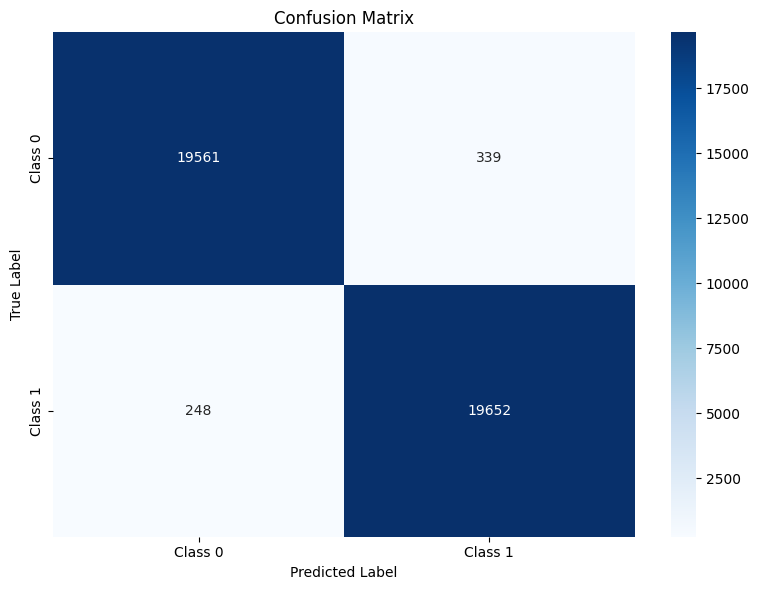

In [241]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names for binary classification
class_names = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Saving the model

In [242]:
# Save the model in HDF5 format
model.save("../6sbf_replayCheck_MobileNet.keras")

#### Loading the model

In [243]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model = load_model("../6sbf_replayCheck_MobileNet.keras")

### 10 fold validation

In [244]:
from sklearn.model_selection import StratifiedKFold

In [245]:
n_splits = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [246]:
# Metrics to store performance
folds_evaluation = {}
fold_accuracies = []

for index in range(n_splits):
    folds_evaluation[index] = {}

In [249]:
# Preprocess data to match MobileNet input size
input_shape = (32, 128, 3)  # Input size compatible with MobileNet
X_preprocessed = preprocess_data(X, target_size=(32, 128))

In [ ]:
fold_counter = 0

# 10-fold Cross Validation
for train_index, val_index in skf.split(X_preprocessed, y):

    # Split data
    X_train, X_val = X_preprocessed[train_index], X_preprocessed[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the MobileNet model
    model = create_mobilenet_model(input_shape)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train your model (assuming you have a model object `model`)
    model.fit(X_train, y_train, epochs=10, batch_size=128)
    
    # Validate the model
    # Accuracy, loss
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
    fold_accuracies.append(val_accuracy)

    # AUPR
    y_pred_probs = model.predict(X_val)
    y_test_onehot = to_categorical(y_val, num_classes=2)
    aupr = calculate_aupr(y_test_onehot, y_pred_probs)

    # AUC-ROC
    auc_roc = calculate_auc_roc(y_val, y_pred_probs)
    
    # Saving the evaluation results
    folds_evaluation[fold_counter]["accuracy"] =  val_accuracy
    folds_evaluation[fold_counter]["loss"] =  val_loss
    folds_evaluation[fold_counter]["AUPR"] =  aupr
    folds_evaluation[fold_counter]["AUC_ROC"] = auc_roc
    
    fold_counter += 1

In [ ]:
folds_evaluation

In [ ]:
# Average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print("10-Fold Cross-Validation Accuracy:", average_accuracy)

In [ ]:
folds_evaluation["average_accuracy"] = average_accuracy

In [ ]:
import json

# Save to a text file
with open("../6sbf_replayCheck_MobileNet.txt", "w") as file:
    json.dump(folds_evaluation, file, indent=4) 

In [ ]:
np.min(fold_accuracies)

In [ ]:
np.max(fold_accuracies)

### MobileNet: v3 small

In [308]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.image import resize

In [309]:
def preprocess_data(X, target_size=(32, 32)):
    # Resize or pad images to the target size
    resized_images = np.array([resize(img, target_size).numpy() for img in X])
    return resized_images

In [310]:
def create_mobilenetv3small_model(input_shape=(32, 32, 3)):
    # Input layer
    inputs = Input(shape=input_shape)

    # Base model (MobileNetV3Small) without pretrained weights
    base_model = MobileNetV3Small(
        input_shape=input_shape,
        include_top=False,
        weights=None  # No pretrained weights
    )

    # Pass the inputs through the base model
    x = base_model(inputs, training=True)
    
    # Add custom classification layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid', name='Similarity')(x)

    # Create the model
    model = Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [311]:
model = create_mobilenetv3small_model(input_shape=(32, 32, 3))

In [312]:
X_preprocessed = preprocess_data(X, target_size=(32, 32))

### Splitting train/test data (EKMs)

In [313]:
# Splitting train and test data by proportion of 80/20
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

In [314]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
3980/3980 [==============================] - 216s 50ms/step - loss: 0.3031 - accuracy: 0.8559 - val_loss: 0.2061 - val_accuracy: 0.9061
Epoch 2/10
3980/3980 [==============================] - 202s 51ms/step - loss: 0.1188 - accuracy: 0.9570 - val_loss: 0.1066 - val_accuracy: 0.9625
Epoch 3/10
3980/3980 [==============================] - 201s 51ms/step - loss: 0.0915 - accuracy: 0.9677 - val_loss: 0.0867 - val_accuracy: 0.9682
Epoch 4/10
3980/3980 [==============================] - 203s 51ms/step - loss: 0.0810 - accuracy: 0.9712 - val_loss: 0.0839 - val_accuracy: 0.9713
Epoch 5/10
3980/3980 [==============================] - 203s 51ms/step - loss: 0.0742 - accuracy: 0.9735 - val_loss: 0.0779 - val_accuracy: 0.9723
Epoch 6/10
3980/3980 [==============================] - 201s 51ms/step - loss: 0.0686 - accuracy: 0.9754 - val_loss: 0.0715 - val_accuracy: 0.9752
Epoch 7/10
3980/3980 [==============================] - 201s 50ms/step - loss: 0.0653 - accuracy: 0.9765 - val_loss: 0

### Evaluation

#### Accuracy, loss

In [315]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1244/1244 - 23s - loss: 0.0662 - accuracy: 0.9778 - 23s/epoch - 19ms/step
Test Loss: 0.0662
Test Accuracy: 0.9778


#### AUPR

In [316]:
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.utils import to_categorical

In [317]:
def calculate_aupr(y_true, y_pred_probs):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR).
    """
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred_probs.ravel())
    aupr = auc(recall, precision)
    return aupr

In [318]:
y_pred_probs = model.predict(X_test)
# y_test_onehot = to_categorical(y_test, num_classes=2)

aupr = calculate_aupr(y_test, y_pred_probs)
print(f"AUPR: {aupr:.4f}")

1244/1244 [==============================] - 27s 21ms/step
AUPR: 0.9976


#### AUC-ROC

In [319]:
from sklearn.metrics import roc_auc_score

def calculate_auc_roc(y_true, y_pred_probs):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).
    """
    auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')  # 'ovr' for one-vs-rest
    return auc_roc

In [320]:
y_pred_probs = model.predict(X_test)
auc_roc = calculate_auc_roc(y_test, y_pred_probs)
print(f"AUC-ROC: {auc_roc:.4f}")

   1/1244 [..............................] - ETA: 44s

1244/1244 [==============================] - 26s 21ms/step
AUC-ROC: 0.9976


#### Confusion matrix

In [321]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    return cm

1244/1244 [==============================] - 24s 19ms/step


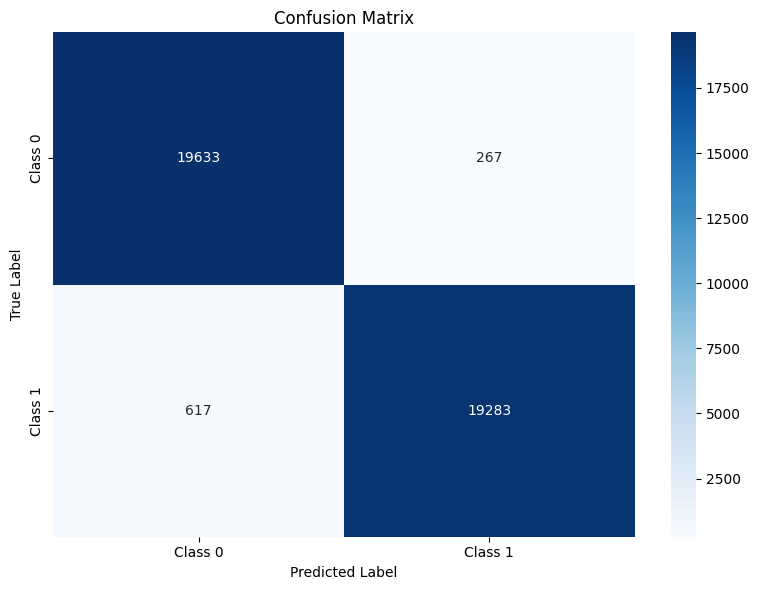

In [322]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names for binary classification
class_names = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Saving the model

In [301]:
# Save the model in HDF5 format
model.save("../6sbf_replayCheck_MobileNetV3Small.keras")

#### Loading the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model = load_model("../6sbf_replayCheck_MobileNetV3Small.keras")

### 10 fold validation

In [323]:
from sklearn.model_selection import StratifiedKFold

In [324]:
n_splits = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [325]:
# Metrics to store performance
folds_evaluation = {}
fold_accuracies = []

for index in range(n_splits):
    folds_evaluation[index] = {}

In [328]:
fold_counter = 0

# 10-fold Cross Validation
for train_index, val_index in skf.split(X_preprocessed, y):

    # Split data
    X_train, X_val = X_preprocessed[train_index], X_preprocessed[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the MobileNet model
    model = create_mobilenetv3small_model(input_shape)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train your model (assuming you have a model object `model`)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    
    # Validate the model
    # Accuracy, loss
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
    fold_accuracies.append(val_accuracy)

    # AUPR
    y_pred_probs = model.predict(X_val)
    # y_test_onehot = to_categorical(y_val, num_classes=2)
    aupr = calculate_aupr(y_val, y_pred_probs)

    # AUC-ROC
    auc_roc = calculate_auc_roc(y_val, y_pred_probs)
    
    # Saving the evaluation results
    folds_evaluation[fold_counter]["accuracy"] =  val_accuracy
    folds_evaluation[fold_counter]["loss"] =  val_loss
    folds_evaluation[fold_counter]["AUPR"] =  aupr
    folds_evaluation[fold_counter]["AUC_ROC"] = auc_roc
    
    fold_counter += 1

Epoch 1/10
4478/4478 [==============================] - 245s 51ms/step - loss: 0.2882 - accuracy: 0.8705 - val_loss: 2.6639 - val_accuracy: 0.5983
Epoch 2/10
 405/4478 [=>............................] - ETA: 3:02 - loss: 0.1356 - accuracy: 0.9500

KeyboardInterrupt: 

In [ ]:
folds_evaluation

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

In [ ]:
# Average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print("10-Fold Cross-Validation Accuracy:", average_accuracy)

In [ ]:
folds_evaluation["average_accuracy"] = average_accuracy

In [ ]:
import json

# Save to a text file
with open("../6sbf_replayCheck_MobileNetV3Small.txt", "w") as file:
    json.dump(folds_evaluation, file, indent=4) 

In [ ]:
np.min(fold_accuracies)

In [ ]:
np.max(fold_accuracies)